In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import librosa 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution1D, MaxPooling1D

# Define the path for your 1 second audio files
fireworks_dir = "D:/scriptie/sensor_analysis/CNN-training/data/fireworks1"
rain_dir = "D:/scriptie/sensor_analysis/CNN-training/data/rain1"
wind_dir = "D:/scriptie/sensor_analysis/CNN-training/data/wind1"




In [2]:
# Load the data
data = []
labels = []

for f in os.listdir(fireworks_dir):
    sound_clip,sr = librosa.load(os.path.join(fireworks_dir, f))
    mfcc = librosa.feature.mfcc(y=sound_clip, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfcc.T,axis=0)
    data.append(mfccs_processed)
    labels.append("fireworks")

for f in os.listdir(rain_dir):
    sound_clip,sr = librosa.load(os.path.join(rain_dir, f))
    mfcc = librosa.feature.mfcc(y=sound_clip, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfcc.T,axis=0)
    data.append(mfccs_processed)
    labels.append("rain")

for f in os.listdir(wind_dir):
    sound_clip,sr = librosa.load(os.path.join(wind_dir, f))
    mfcc = librosa.feature.mfcc(y=sound_clip, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfcc.T,axis=0)
    data.append(mfccs_processed)
    labels.append("wind")



In [3]:
# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels to integers
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))





In [4]:
data

array([[-2.8798938e+02,  1.5416052e+02, -4.1431076e+01, ...,
        -6.3256842e-01, -3.6440139e+00,  1.1721566e+00],
       [-3.6008942e+02,  1.3011470e+02, -5.5922619e+01, ...,
         9.2010915e-01, -1.7134011e+00,  1.6599959e+00],
       [-5.3130328e+02,  1.8298308e+02, -9.8676949e+00, ...,
         2.0966678e+00, -1.6163479e+00,  1.2407779e+00],
       ...,
       [-2.1475992e+02,  2.0524623e+02, -7.7344462e-02, ...,
         6.0647106e-01, -3.0317602e+00, -8.3849722e-01],
       [-2.2383194e+02,  2.0685716e+02,  4.4406099e+00, ...,
         6.2225169e-01, -1.5964386e+00,  2.3632218e-01],
       [-2.4207266e+02,  2.0488597e+02,  1.4659313e+01, ...,
         9.0404379e-01, -2.2471735e+00,  7.9948479e-01]], dtype=float32)

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

num_labels = 3



In [6]:
# Build model
model = Sequential()

model.add(Convolution1D(128, 5, padding='same', input_shape=(40, 1)))  # Adjust input shape if necessary
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Convolution1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [8]:
# Fit the model
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))



Epoch 1/100
52/52 [==============================] - 6s 26ms/step - loss: 5.3636 - accuracy: 0.4834 - val_loss: 1.9780 - val_accuracy: 0.5205
Epoch 2/100
52/52 [==============================] - 1s 24ms/step - loss: 2.2369 - accuracy: 0.5851 - val_loss: 0.5837 - val_accuracy: 0.7671
Epoch 3/100
52/52 [==============================] - 1s 26ms/step - loss: 1.2422 - accuracy: 0.6477 - val_loss: 0.6266 - val_accuracy: 0.7534
Epoch 4/100
52/52 [==============================] - 1s 16ms/step - loss: 0.7414 - accuracy: 0.7084 - val_loss: 0.5789 - val_accuracy: 0.7626
Epoch 5/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6812 - accuracy: 0.7339 - val_loss: 0.5129 - val_accuracy: 0.8447
Epoch 6/100
52/52 [==============================] - 1s 19ms/step - loss: 0.6118 - accuracy: 0.7358 - val_loss: 0.5028 - val_accuracy: 0.8082
Epoch 7/100
52/52 [==============================] - 1s 25ms/step - loss: 0.5827 - accuracy: 0.7534 - val_loss: 0.6154 - val_accuracy: 0.7717
Epoch 

52/52 [==============================] - 1s 12ms/step - loss: 0.2299 - accuracy: 0.9217 - val_loss: 0.3664 - val_accuracy: 0.9269
Epoch 59/100
52/52 [==============================] - 1s 21ms/step - loss: 0.1697 - accuracy: 0.9393 - val_loss: 0.2679 - val_accuracy: 0.9315
Epoch 60/100
52/52 [==============================] - 1s 18ms/step - loss: 0.1642 - accuracy: 0.9452 - val_loss: 0.3107 - val_accuracy: 0.9361
Epoch 61/100
52/52 [==============================] - 1s 26ms/step - loss: 0.1184 - accuracy: 0.9511 - val_loss: 0.2955 - val_accuracy: 0.9406
Epoch 62/100
52/52 [==============================] - 1s 21ms/step - loss: 0.1578 - accuracy: 0.9589 - val_loss: 0.3172 - val_accuracy: 0.9406
Epoch 63/100
52/52 [==============================] - 1s 26ms/step - loss: 0.1418 - accuracy: 0.9472 - val_loss: 0.3105 - val_accuracy: 0.9406
Epoch 64/100
52/52 [==============================] - 1s 22ms/step - loss: 0.1407 - accuracy: 0.9550 - val_loss: 0.3441 - val_accuracy: 0.9406
Epoch 65/100

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test set accuracy: {accuracy * 100}%")


7/7 [==============================] - 0s 15ms/step - loss: 0.4336 - accuracy: 0.9178
Test set accuracy: 91.78082346916199%


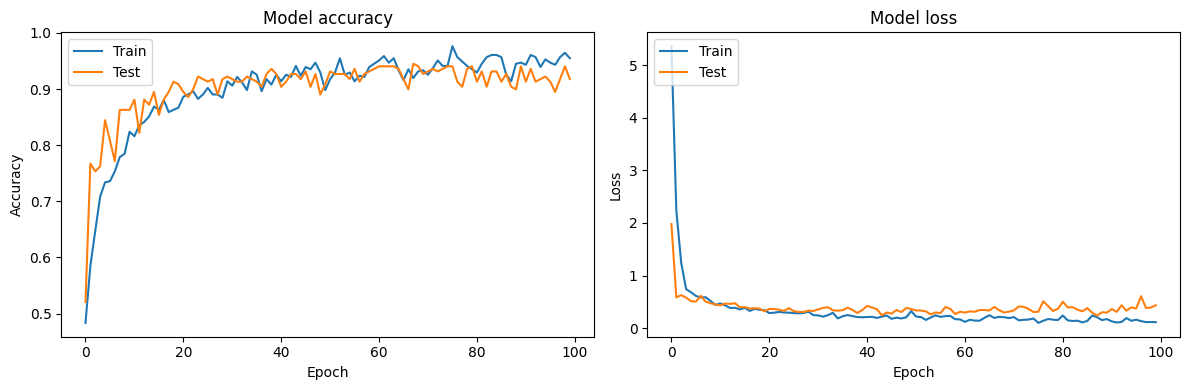

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       104
           1       0.96      0.79      0.87        66
           2       0.84      1.00      0.92        49

    accuracy                           0.92       219
   macro avg       0.91      0.92      0.91       219
weighted avg       0.92      0.92      0.92       219



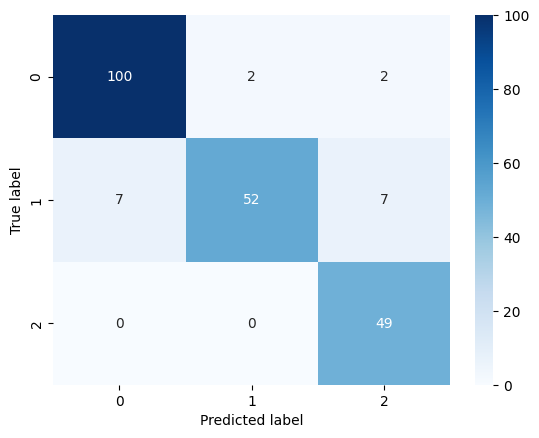

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions
predictions_prob = model.predict(x_test)

# Convert predictions classes to one hot vectors 
predictions = np.argmax(predictions_prob, axis=1) 

# Convert test set labels to one hot vectors
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test_classes, predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
# Save the model
model.save('my_model-1-wav-mfcc')
model.save('my_model-1-wav-mfcc.h5')


INFO:tensorflow:Assets written to: my_model-1-wav-mfcc\assets


INFO:tensorflow:Assets written to: my_model-1-wav-mfcc\assets


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 128)           768       
                                                                 
 activation (Activation)     (None, 40, 128)           0         
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_1 (Activation)   (None, 5, 128)            0         
                                                        